# Plotting sequence logos

The code in this tutorial is released under the [MIT License](https://opensource.org/licenses/MIT). All the content in this notebook is under a [CC-by 4.0 License](https://creativecommons.org/licenses/by/4.0/). 

In [1]:
import regseq.viz
import pandas as pd

import regseq.information
import numpy as np


import regseq.find_region as find_region

import matplotlib.pyplot as plt
%matplotlib inline

# Get svg graphics from the notebook
%config InlineBackend.figure_format = 'svg' 

For a detailed explanation of the steps leading to this notebook, as well as the experimental context, refer to the [Reg-Seq wiki](https://github.com/RPGroup-PBoC/RegSeq/wiki).

Previously we analyzed the datasets that can be obtained in a Reg-Seq experiment and using statistical inference methods to inferer how mutations at each base in a promoter sequence change gene expression, and we computed information footprints which we used to identify binding sites for repressors and activators. In this step, we are going to automatically identify significant binding sites and use the `logomaker` package to plot sequence logos of the identified sites.

First, let's look at the information footprint we created previously from an energy matrix computed by an MCMC algorithm with sufficient number of steps.

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/mpathic_env/lib/python3.6/site-packages/matplotlib/pyplot.py'>

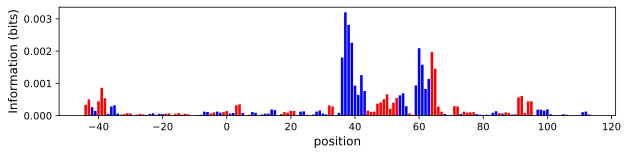

In [2]:
regseq.viz.footprint_from_emat("../data/results/MCMC/bdcRAnaerodataset_alldone_with_largeMCMC194", output_file=None, old_format=True, gene="bdcR")

We can use the information footprint to automatically find the regions that contain interesting regulatory features for plotting. We do this by summing the mutual information over a subset of bases, and use a threshold to determine if the part of sequence is significant or not. To do this automatically for the promoter region of a gene that was investigated in the Reg-Seq experiment, we use the function `regseq.find_region.find_region`, which takes the statistical inference results as input, as well as an argument which tells the function if the file is in the old format, (file name does not end with `.csv`), the name of the gene, the growth condition, and the threshold value.

In [3]:
regions = find_region.find_region("../data/results/MCMC/bdcRAnaerodataset_alldone_with_largeMCMC194", 
    old_format=True,
    gene="bdcR", growth='Anaero', thresh=0.0003)

The function's output is a data frame which contains the beginning and end of the binding site, as well as the type, either activator or repressor.

In [4]:
regions

,gene,feat_num,start,end,type
0,bdcR,0,40,79,act
1,bdcR,0,23,70,rep


This is a repressor region overlapping the activator like RNAP region. We will plot the RNAP region as a sequence logo. Therefore we need to extract the start and end of the site.

In [5]:
target_start = regions.loc[0, 'start']
target_end = regions.loc[0, 'end']

We first need to find the proper scaling factor for conversion to information logo. Empirically, it is known
that binding sites have approximately 1 bit of information per base pair. Logos are then produced using the package `logomaker`. To produce logos, we can use the function `regseq.viz.logo`. As input we need to give the file path to the energy matrix inferred previously, as well as the range of the sequence that we wish to produce the logo for, `limit`. As before, we also tell the function that the file format. (The last argument is going to be removed in the next iteration, such that it is taken automatically.)

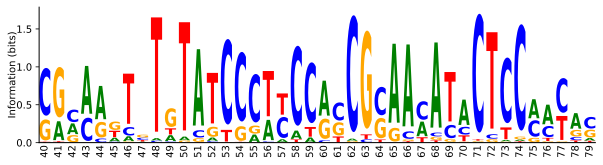

In [7]:
regseq.viz.logo("../data/results/MCMC/bdcRAnaerodataset_alldone_with_largeMCMC194", limit=(target_start,target_end), old_format=True, pos=44)

These logos can be used for nice figures in papers. (Here needs to be a nice conclusion on what to do with the figures, Bill please add a short note.)

Finally, here are the versions of packages used in this notebook. To display the versions, we are using the Jupyter Lab extension `watermark`, which can be found [here](https://github.com/rasbt/watermark).

## Computing environment

In [8]:
%load_ext watermark
%watermark -v -p jupyterlab,numpy,pandas,logomaker,matplotlib

CPython 3.6.9
IPython 7.13.0

jupyterlab not installed
numpy 1.18.1
pandas 1.0.3
logomaker 0.8
matplotlib 3.1.3
